In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn

In [5]:
data = pd.read_csv(r"C:\Users\valid\Desktop\LLM\lanugchain\Housing.csv")

In [6]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
data = data.replace(to_replace = 'yes' , value = 1 , regex = True)

In [42]:
data = data.replace(to_replace = 'no' , value = 0 , regex= True)

In [43]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [44]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [51]:
data = data.drop(['furnishingstatus'] , axis = 1)

In [53]:
X = data.loc[ : , data.columns != 'price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0
541,2400,3,1,1,0,0,0,0,0,0,0
542,3620,2,1,1,1,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0


In [54]:
y = data['price']

In [55]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [56]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [57]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [58]:
X.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [59]:
X.isnull().sum()

area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
dtype: int64

In [60]:
X.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627


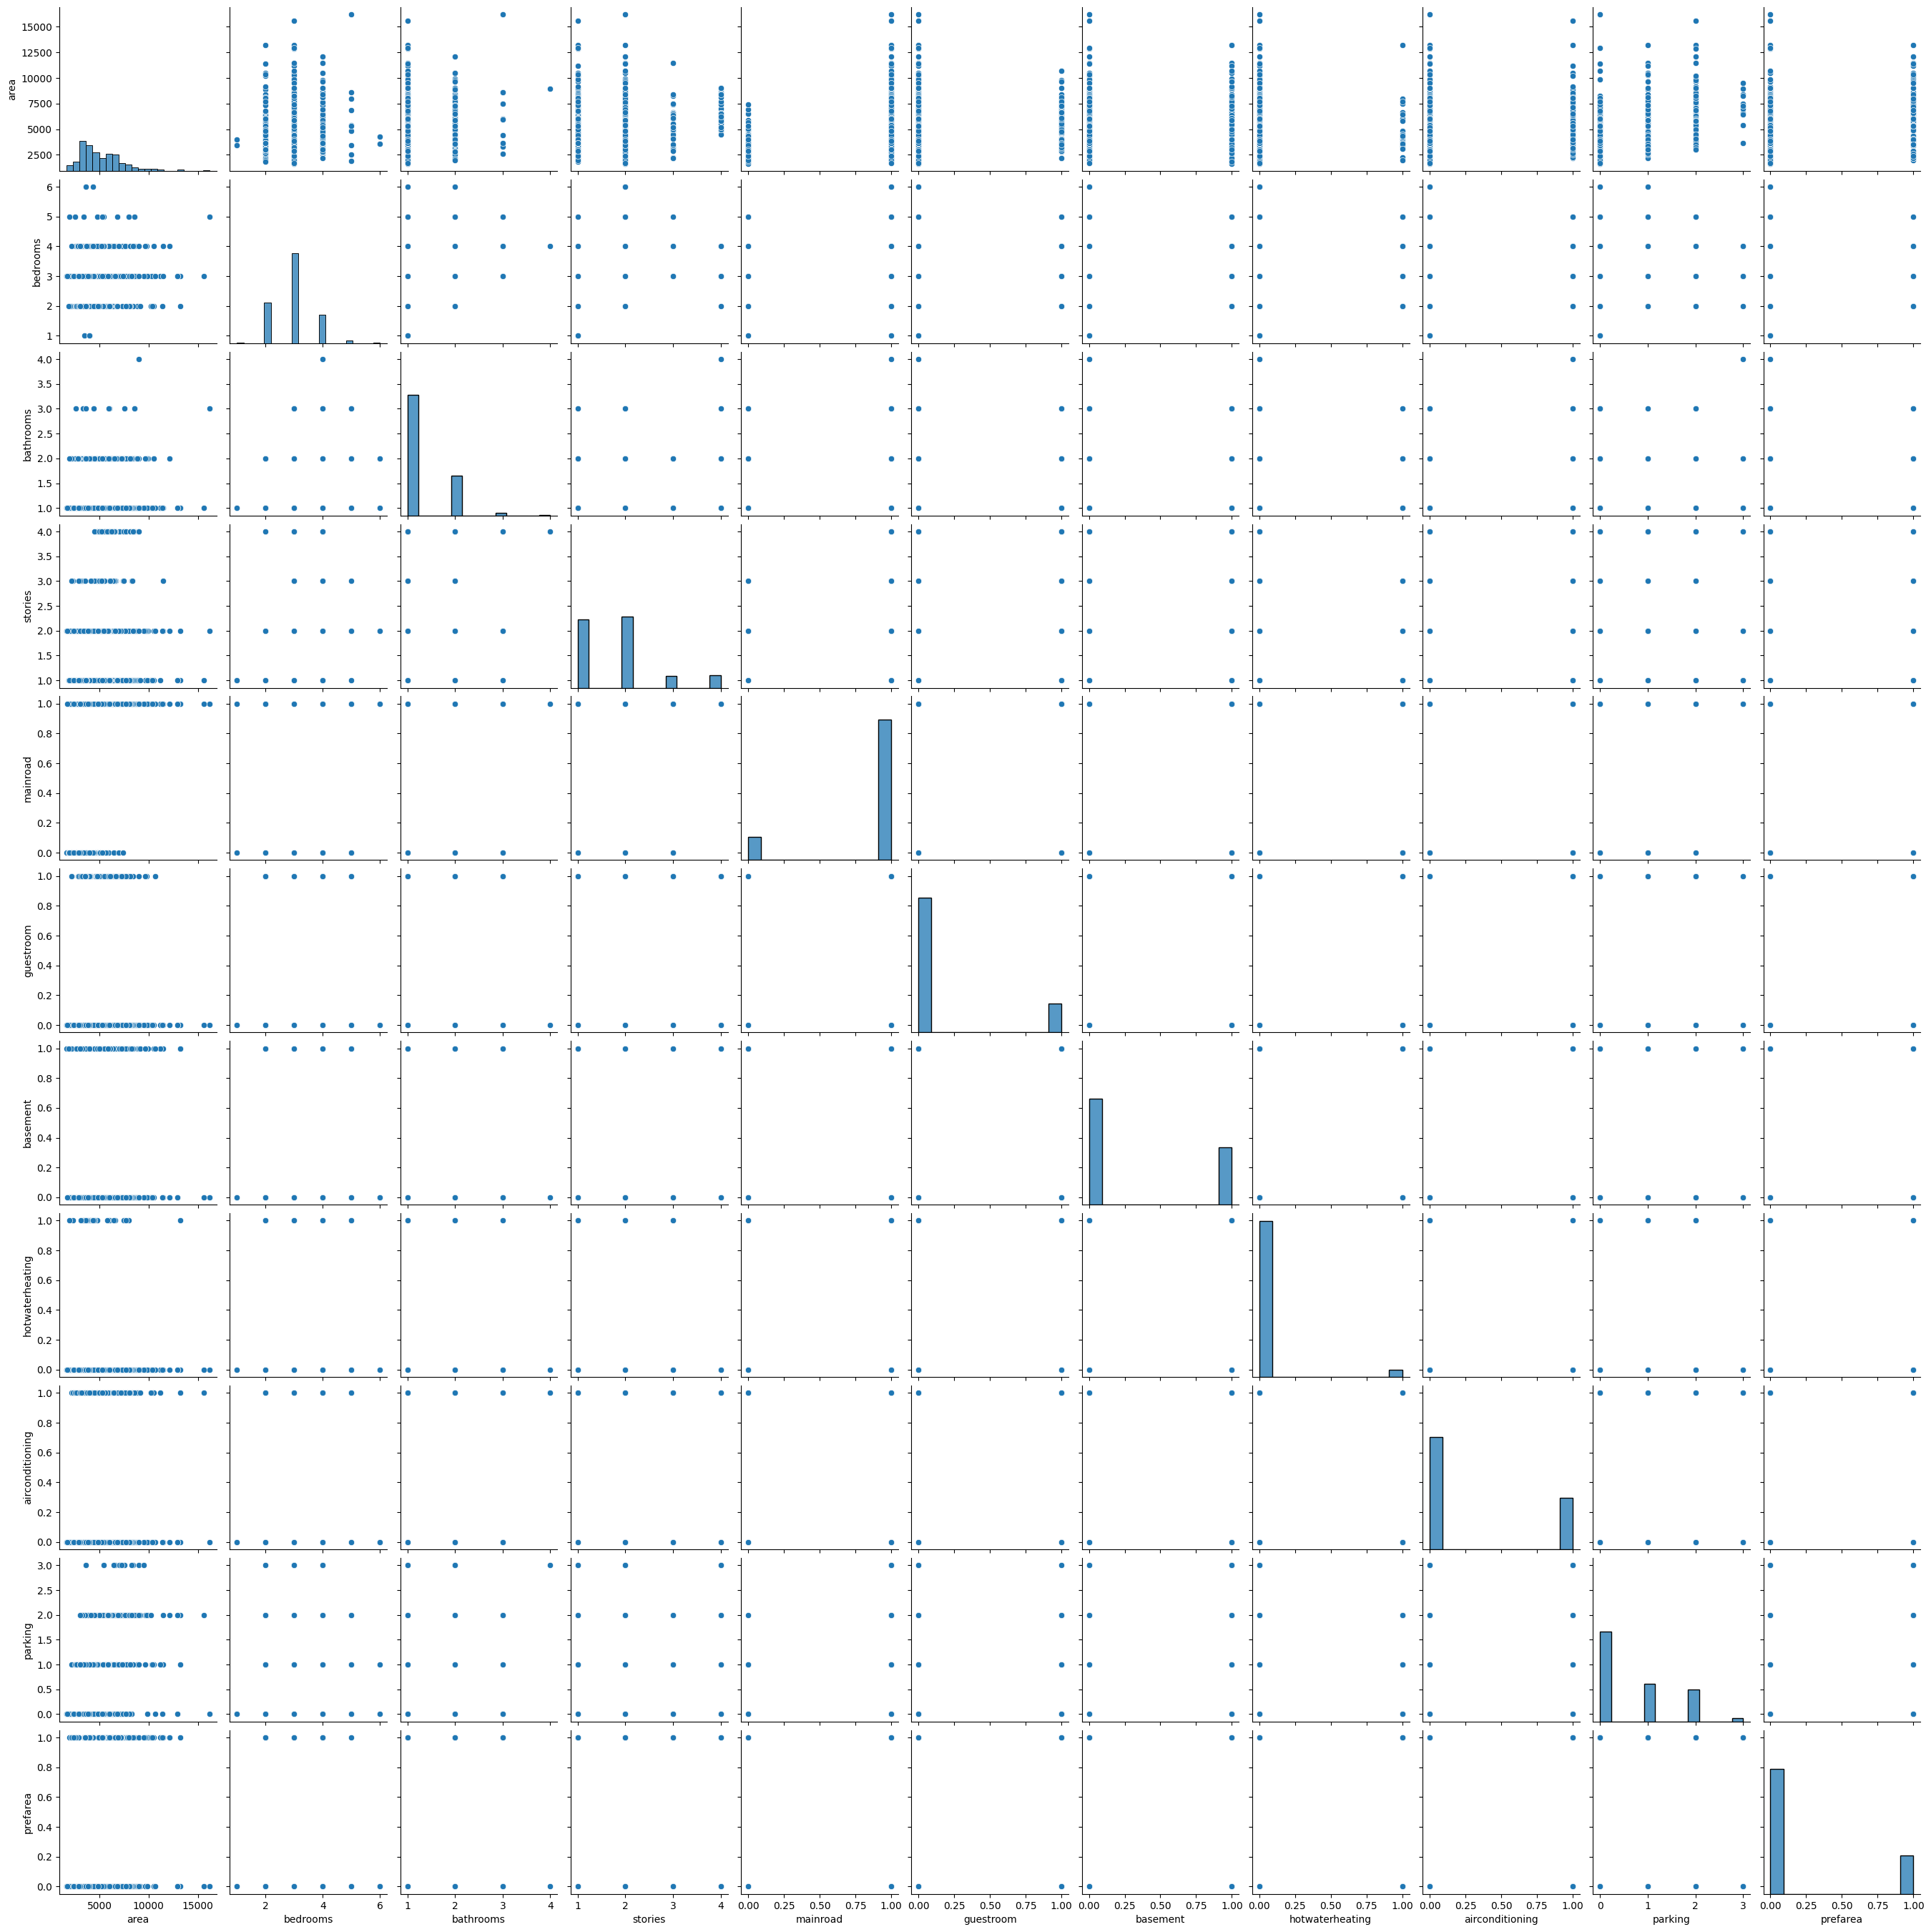

In [61]:
import seaborn as sns
sns.pairplot(X)

In [62]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             545 non-null    int64
 1   bedrooms         545 non-null    int64
 2   bathrooms        545 non-null    int64
 3   stories          545 non-null    int64
 4   mainroad         545 non-null    int64
 5   guestroom        545 non-null    int64
 6   basement         545 non-null    int64
 7   hotwaterheating  545 non-null    int64
 8   airconditioning  545 non-null    int64
 9   parking          545 non-null    int64
 10  prefarea         545 non-null    int64
dtypes: int64(11)
memory usage: 47.0 KB


In [64]:
X.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [65]:
X.isnull().sum()

area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
dtype: int64

## Analyzing the correlated features 

In [66]:
X.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627


In [68]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

Text(0, 0.5, 'Price')

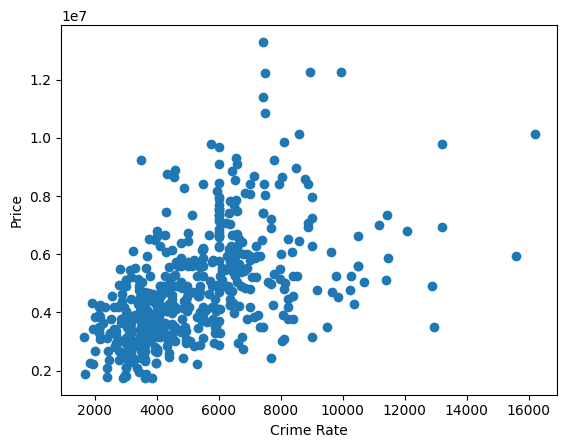

In [70]:
plt.scatter(X['area'],y)
plt.xlabel("area")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

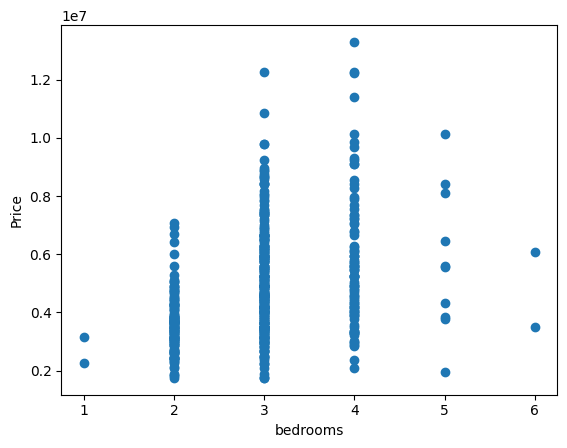

In [71]:
plt.scatter(X['bedrooms'],y)
plt.xlabel("bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

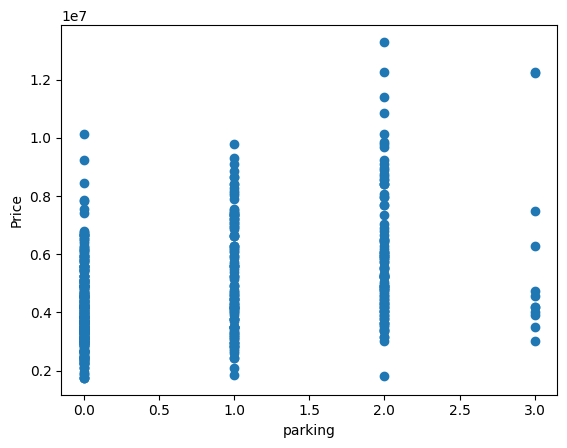

In [72]:
plt.scatter(X['parking'],y)
plt.xlabel("parking")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

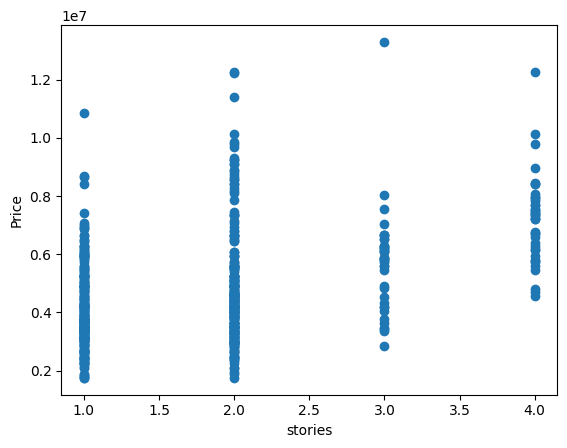

In [73]:
plt.scatter(X['stories'],y)
plt.xlabel("stories")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

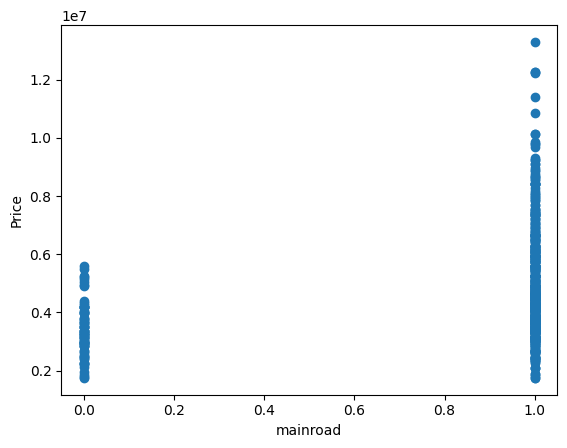

In [75]:
plt.scatter(X['mainroad'],y)
plt.xlabel("mainroad")
plt.ylabel("Price")

In [76]:
## Train Test Split 
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3 , random_state = 42)

In [77]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,7160,3,1,1,1,0,1,0,0,2,1
363,3584,2,1,1,1,0,0,1,0,0,0
370,4280,2,1,1,1,0,0,0,1,2,0
31,7000,3,1,4,1,0,0,0,1,2,0
113,9620,3,1,1,1,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0
106,5450,4,2,1,1,0,1,0,1,0,1
270,4500,3,2,3,1,0,0,1,0,1,0
435,4040,2,1,1,1,0,0,0,0,0,0


In [78]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

In [84]:
import pickle 
pickle.dump(scaler , open('scaling.pkl' , 'wb'))

In [85]:
X_train

array([[ 0.93430081,  0.0558608 , -0.55323817, ..., -0.68219104,
         1.59160337,  1.79814719],
       [-0.71024648, -1.27432452, -0.55323817, ..., -0.68219104,
        -0.80051057, -0.556128  ],
       [-0.39016681, -1.27432452, -0.55323817, ...,  1.46586505,
         1.59160337, -0.556128  ],
       ...,
       [-0.2889922 ,  0.0558608 ,  1.55459927, ..., -0.68219104,
         0.3955464 , -0.556128  ],
       [-0.50053911, -1.27432452, -0.55323817, ..., -0.68219104,
        -0.80051057, -0.556128  ],
       [ 0.17089239,  0.0558608 ,  1.55459927, ...,  1.46586505,
         0.3955464 , -0.556128  ]])

In [86]:
X_test

array([[ 0.35484623,  1.38604612,  1.55459927, ..., -0.68219104,
         0.3955464 , -0.556128  ],
       [ 0.63077698,  0.0558608 ,  1.55459927, ...,  1.46586505,
        -0.80051057,  1.79814719],
       [-0.50053911, -1.27432452, -0.55323817, ..., -0.68219104,
        -0.80051057, -0.556128  ],
       ...,
       [-0.33038181,  1.38604612,  3.66243672, ..., -0.68219104,
         1.59160337, -0.556128  ],
       [ 1.78048845,  0.0558608 , -0.55323817, ..., -0.68219104,
         1.59160337, -0.556128  ],
       [-0.6798941 ,  0.0558608 ,  1.55459927, ..., -0.68219104,
         1.59160337, -0.556128  ]])

## Model training 

In [88]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train , y_train)

LinearRegression()

In [89]:
## Print the coefficient and the intercept
print(regression.coef_)

[557068.59376123  65676.34808425 533972.49500758 375228.88954638
 155124.20054491 115592.04914055 249113.17439404 145538.0364181
 326316.51422415 267057.32432526 219480.09739395]


In [90]:
print(regression.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [91]:
## prediction with test data
reg_pred = regression.predict(X_test)

In [92]:
reg_pred

array([5589736.28979535, 6922516.13045924, 2990864.49663133,
       4460551.81261189, 3057731.22961838, 3764808.07222543,
       5565722.86483356, 6302621.71884812, 2950323.41467239,
       2283074.22553977, 9742545.7726653 , 2963708.64687903,
       3157969.6927991 , 3340107.2492496 , 4014851.2212207 ,
       5504676.48354333, 2903682.13909617, 5036154.84802683,
       4815899.04703208, 3492991.52978706, 5853271.41960684,
       5825342.92798711, 2890695.277262  , 5104285.71702472,
       5634140.36602191, 7830488.23524944, 3563459.06841073,
       5188730.80527852, 8235953.9177352 , 3159869.40091032,
       6365726.78177663, 3597389.35986099, 6574559.95900929,
       4173348.06630065, 3789325.21849481, 5803019.90142018,
       5123719.36549302, 4600771.1724608 , 3183846.46389589,
       4405552.16194145, 4726435.56931283, 3586773.89342862,
       6902021.14951411, 3874071.60262027, 3685131.97614767,
       4483891.94242031, 6713145.60749061, 4074155.71175069,
       4018175.41650606,

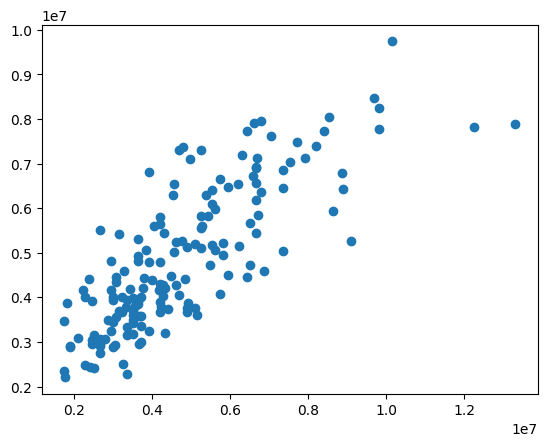

In [93]:
plt.scatter(y_test , reg_pred)

In [94]:
## Residuals
residuals=y_test-reg_pred

In [101]:
residuals

316   -1.529736e+06
77    -2.725161e+05
360    7.191355e+05
90     1.979448e+06
493   -2.577312e+05
           ...     
395   -4.824444e+05
425   -5.697744e+05
195   -2.134821e+06
452   -2.273186e+06
154    3.518884e+05
Name: price, Length: 164, dtype: float64

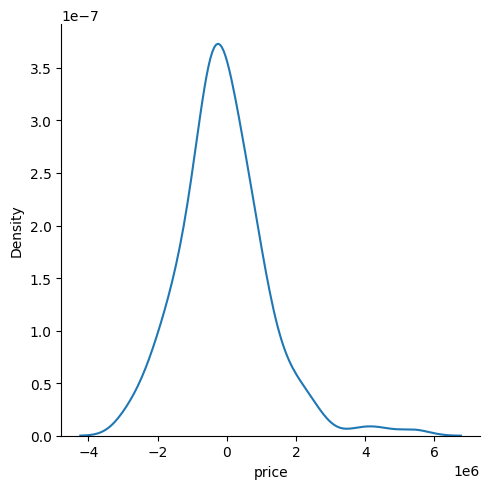

In [102]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

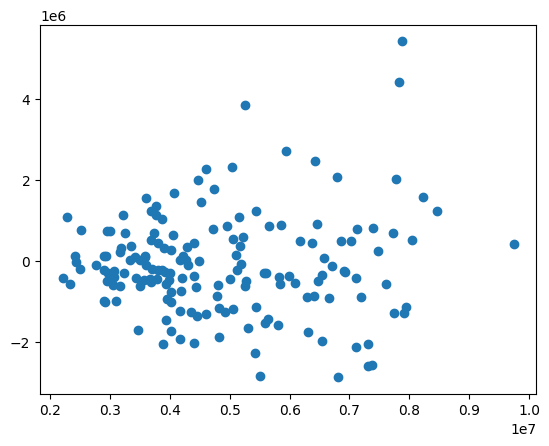

In [103]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

922510.0263097475
1566186555071.444
1251473.7532491218


In [105]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.636311129673722


In [106]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6099915403737941

In [112]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0
541,2400,3,1,1,0,0,0,0,0,0,0
542,3620,2,1,1,1,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0


In [113]:
import pickle

In [114]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [115]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))